In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [3]:
# Importing CSV File

raw_data = pd.read_csv("car data.csv")
raw_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
raw_data['Price_Diff'] = raw_data['Present_Price'] - raw_data['Selling_Price']

In [5]:
raw_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Price_Diff       0
dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Price_Diff     301 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.6+ KB


In [7]:
raw_data.describe(include = 'all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Price_Diff
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189,2.967176
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915,4.828067
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000,0.030000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000,0.390000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000,1.650000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000,3.350000


In [8]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
raw_data['Fuel_Type'] = lbe.fit_transform(raw_data['Fuel_Type'])
raw_data['Selling_type'] = lbe.fit_transform(raw_data['Selling_type'])
raw_data['Transmission'] = lbe.fit_transform(raw_data['Transmission'])

raw_data = raw_data.drop('Car_Name' ,axis = 1)

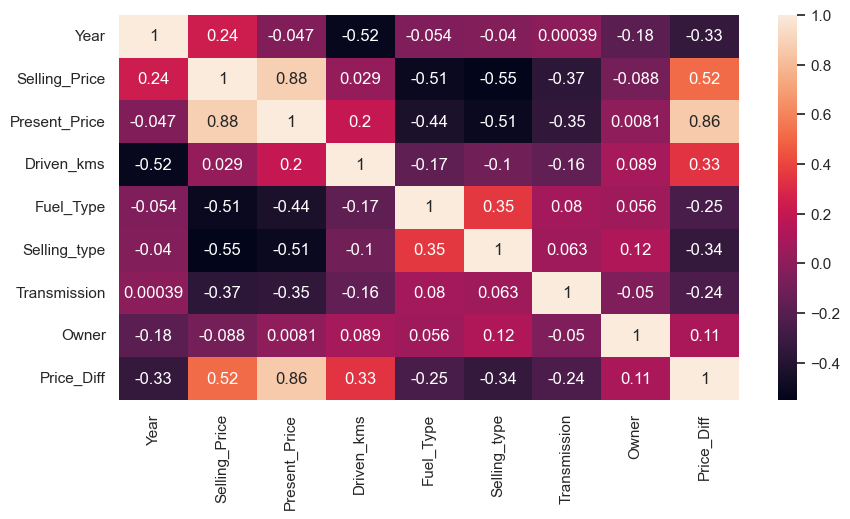

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(raw_data.corr(), annot = True)
plt.show()

##### From the above heatmap it can be seen that their's a strong correlation among [Selling_Price, Present_Price], [Present_Price, Price__Diff], [Selling_Price, Price_Diff], [Driven_kms, Price_Diff], [Fuel_type, Selling_type], [Year, Selling_Price], [Present_Price, Driven_kms]

<Figure size 1000x700 with 0 Axes>

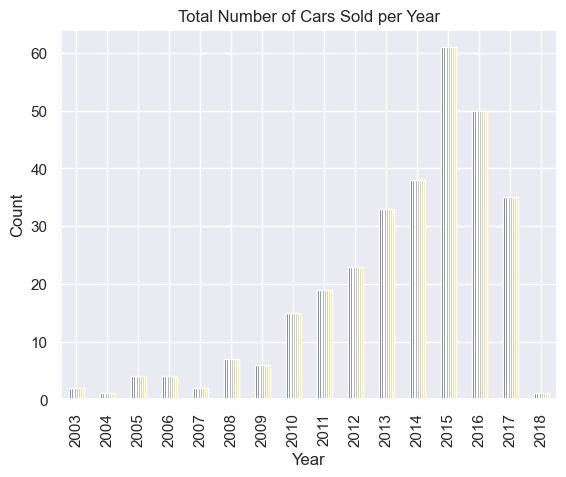

In [10]:
# Frequency of Vechile Sold per Year

plt.figure(figsize = (10,7))
raw_data.groupby('Year').count().plot(kind = 'bar', colormap = 'cividis')
plt.legend().remove()
plt.ylabel('Count')
plt.title("Total Number of Cars Sold per Year")
plt.show()

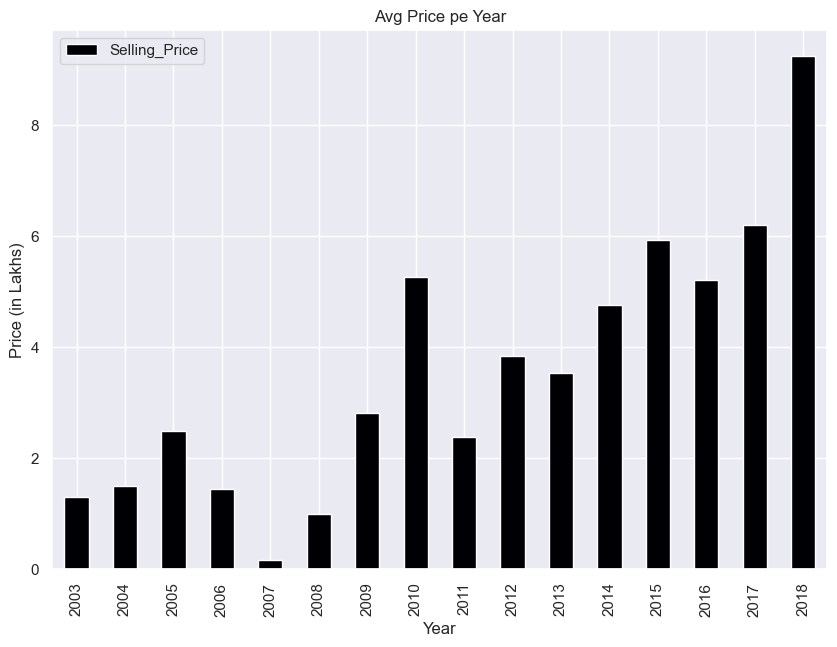

In [11]:
# Avg Price of Vechiles Sold per Year

plt.figure(figsize = (10,7))
raw_data.groupby('Year')['Selling_Price'].mean().plot(kind = 'bar', colormap = 'magma')
plt.ylabel('Price (in Lakhs)')
plt.title("Avg Price pe Year")
plt.legend()
plt.show()

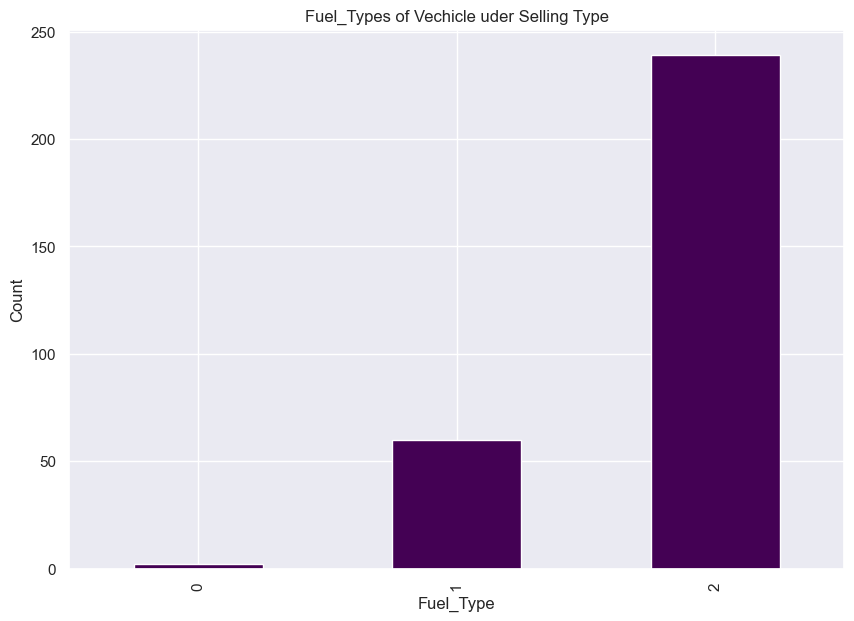

In [12]:
plt.figure(figsize = (10, 7))
raw_data.groupby('Fuel_Type')['Selling_type'].count().plot(kind = 'bar', colormap = 'viridis')
plt.title('Fuel_Types of Vechicle uder Selling Type')
plt.ylabel('Count')
plt.show()

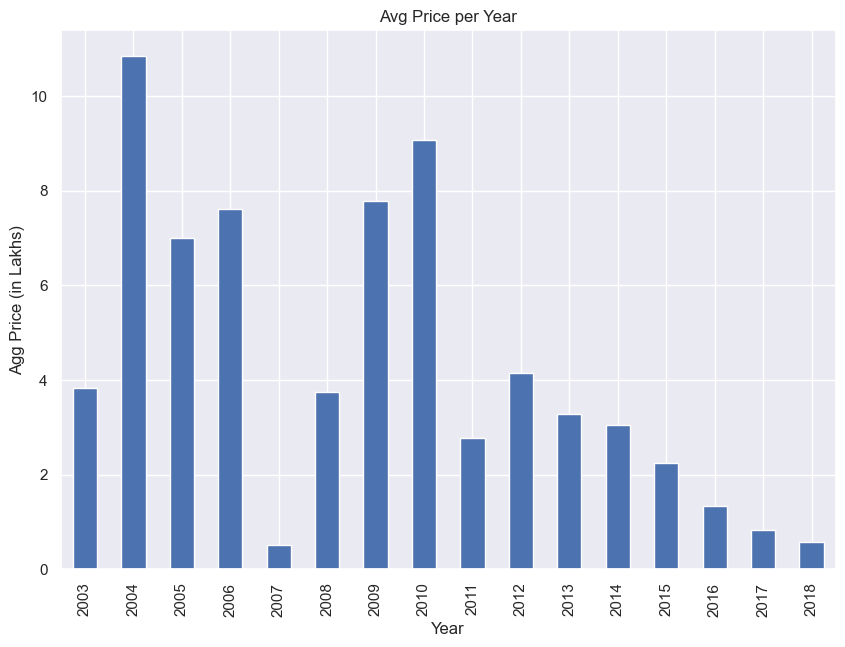

In [13]:
# Avg Price per Year

plt.figure(figsize = (10, 7))
raw_data.groupby('Year')['Price_Diff'].mean().plot(kind = 'bar')
plt.title('Avg Price per Year')
plt.ylabel('Agg Price (in Lakhs)')
plt.show()


In [26]:
# Price variation

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y = raw_data.Present_Price, mode = 'lines', name = 'Present Price'))
fig.add_trace(go.Scatter(y = raw_data.Selling_Price, mode = 'lines', name = 'Selling Price'))
fig.add_trace(go.Scatter(y = raw_data.Price_Diff, mode = 'lines', name = 'Price Diff'))
fig.update_layout(title = 'Line Plot of Price Variation')
fig.show()

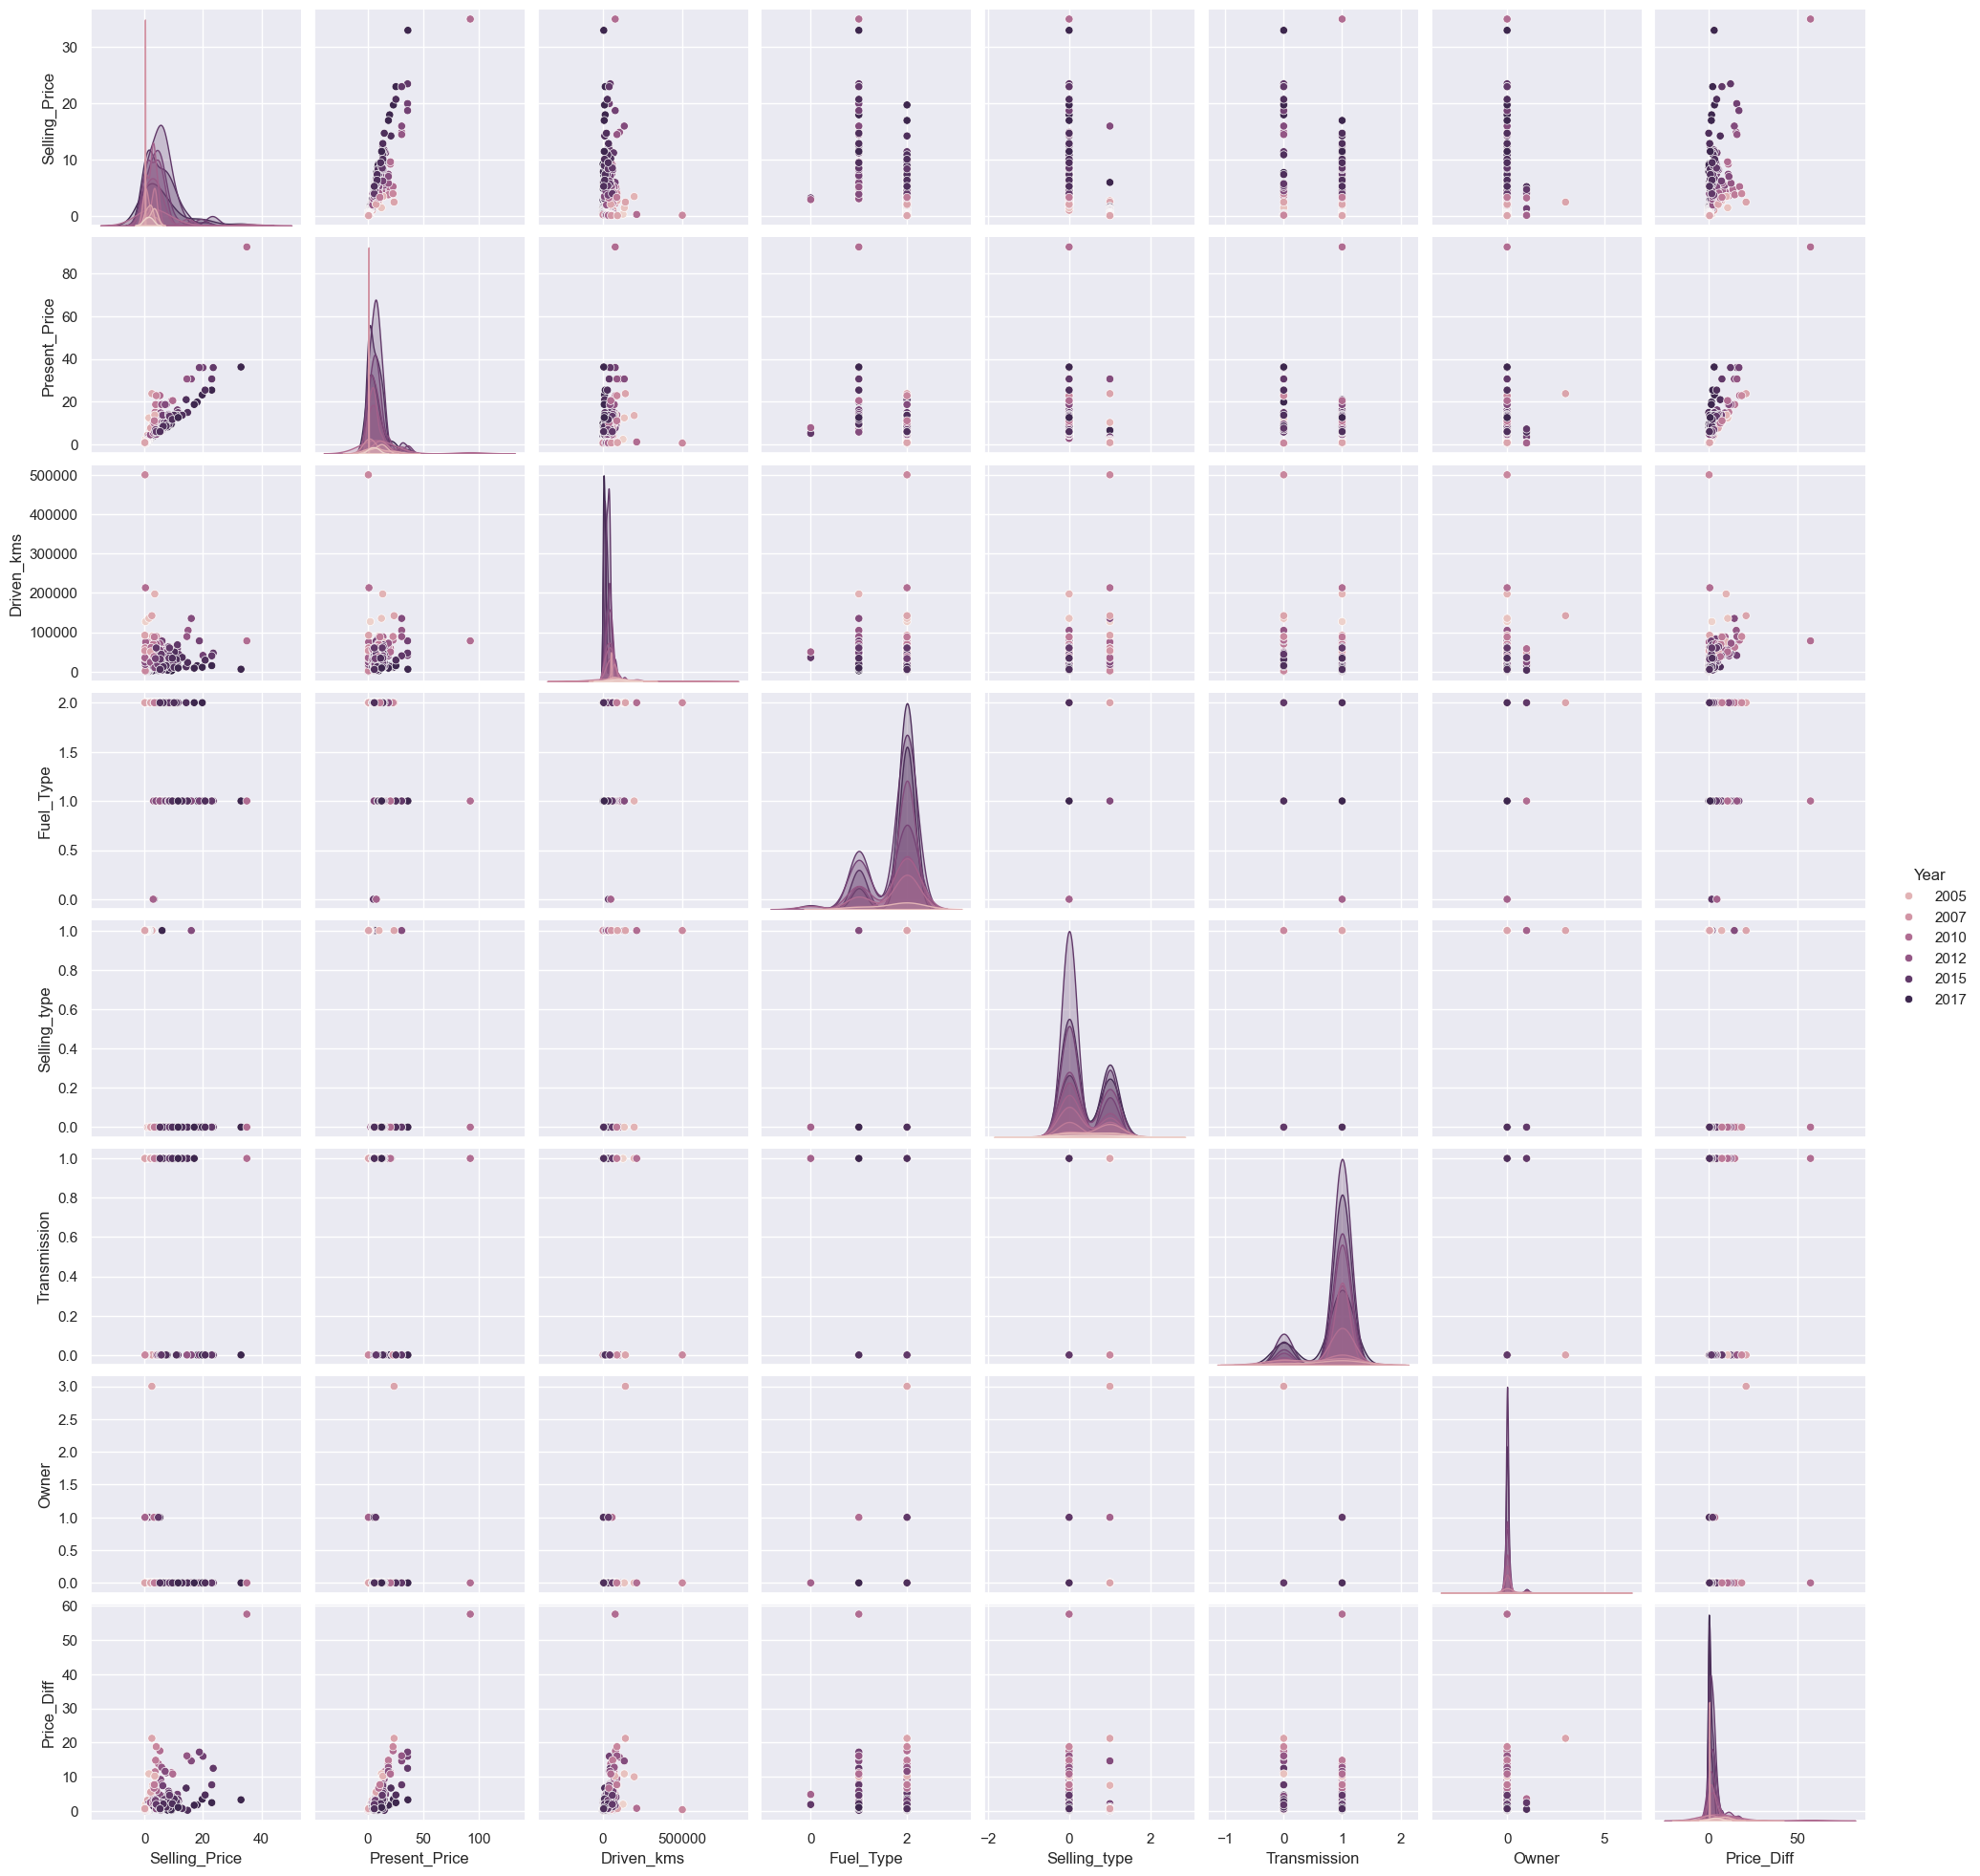

In [15]:
sns.pairplot(data = raw_data, hue = 'Year')

In [16]:
fig = px.box(data_frame=raw_data, x = raw_data['Year'], y = raw_data['Price_Diff'], color = 'Year', title = 'Price Difference per Year')
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [17]:
# Feature Selection and Shuffling
from sklearn.utils import shuffle

X = raw_data.drop(columns = ['Selling_Price'], axis = 1)
Y = raw_data.Selling_Price
X, Y = shuffle(X, Y, random_state = 54)

In [18]:
# Deploying RandomForestRegressor and SequentialFeatureSelector

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = RandomForestRegressor(random_state = 54)
sfs_model = SFS(model, n_features_to_select = 5, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = 5)
sfs_model.fit(X, Y)

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=54),
                          n_features_to_select=5, n_jobs=-1,
                          scoring='neg_mean_squared_error')

In [19]:
sfs_model.get_feature_names_out()

array(['Year', 'Present_Price', 'Fuel_Type', 'Selling_type', 'Price_Diff'],
      dtype=object)

In [20]:
# Splitting the Data

from sklearn.model_selection import train_test_split


X = raw_data[['Year', 'Present_Price', 'Fuel_Type', 'Selling_type', 'Price_Diff']]
Y = raw_data['Selling_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 54)

In [21]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(240, 5) (61, 5)
(240,) (61,)


In [22]:
rfr = RandomForestRegressor(random_state = 54)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=54)

In [23]:
# Predicting the values and Plotting an Accuracy curve

Y_pred = rfr.predict(X_test)
X_test['Selling_Price'] = Y_pred
X_test['Price_Diff_ar'] = X_test['Present_Price'] - X_test['Selling_Price']

# Line Plot
fig = go.Figure()
fig.add_trace(go.Scatter(y = X_test.Price_Diff, mode = 'lines+markers', name = 'Price Diff'))
fig.add_trace(go.Scatter(y = X_test.Price_Diff_ar, mode = 'lines+markers', name = 'Price Diff AR'))
fig.update_layout(title = 'Predicted vs Original (Accuracy)')
fig.show()

In [24]:
# Prediction of Random Values

pred = {
    'Year' : [2003, 2006, 2009, 2012, 2016],
    'Present_Price' : [5.67, 16.34, 13.09, 4.44, 22.22],
    'Fuel_Type' : [0, 1, 2, 2, 1],
    'Selling_type' : [0, 1, 0, 1, 1],
    'Price_Diff' : [4.13, 10.9, 12.32, 0.4, 2.08]
}
pred_df = pd.DataFrame(pred)
pred_val = rfr.predict(pred_df)
pred_df['Selling_Price'] = pred_val
print(f'The Predicted value for Random Data is: \n{pred_df}')

The Predicted value for Random Data is: 
   Year  Present_Price  Fuel_Type  Selling_type  Price_Diff  Selling_Price
0  2003           5.67          0             0        4.13         2.2495
1  2006          16.34          1             1       10.90         4.6534
2  2009          13.09          2             0       12.32         3.9391
3  2012           4.44          2             1        0.40         2.4045
4  2016          22.22          1             1        2.08        16.5305


In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(y = pred_df.Present_Price, mode = 'lines+markers', name = 'Present Price'))
fig.add_trace(go.Scatter(y = pred_df.Selling_Price, mode = 'lines+markers', name = 'Selling Price'))
fig.add_trace(go.Scatter(y = pred_df.Price_Diff, mode = 'lines+markers', name = 'Price Diff'))
fig.update_layout(title = 'Line Plot of Predicted Value with Random Data')
fig.show()